# Data Science & Business Analytics Intern at The Sparks Foundation

# By Mihir Suthar

Task 2 - Prediction using Unsupervised Machine Learning (KMeans Culstering)

This Task is about Prediction of optimum no. of clusters from 'Iris' Dataset 

# Importing Modules

In [1]:
# Importing the modulues
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans

# Loading Iris Dataset

In [2]:
# Load the iris dataset
iris = pd.read_csv('Iris.csv',index_col = 0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding the optimum number of clusters

Elbow Method

In this method,the number of clusters varies within a certain range .For each number,within cluster sum of squares(WCSS) value is calculated and stored in list.The Location of bend in the 2D plot indicates optimum cluster numbers

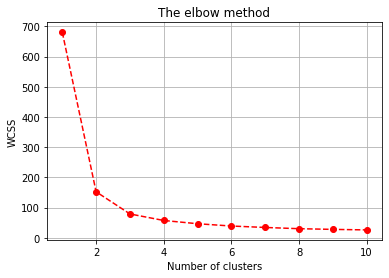

In [4]:
x = iris.iloc[:, [0,1,2,3]].values
wcss = [] #Within clusters sum of squares
clusters_range= range(1,11)
for i in clusters_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results in 2D plot 
# Elbow can be observed from the plot 
plt.plot(clusters_range, wcss,'ro--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show() # plot shows optimum no. clusters =3

# Applying Kmeans to iris dataset

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters (2D Plot)

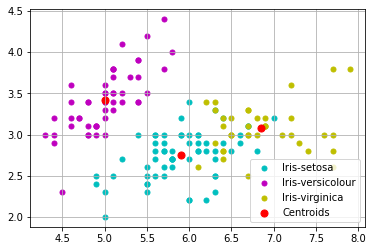

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 25,c='c', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 25,c='m', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 25,c='y', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'r', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()

# 3D Scatter Plot

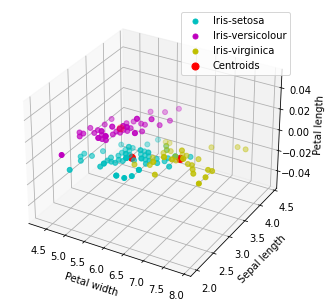

In [7]:
plot3d=plt.figure()
ax = Axes3D(plot3d)
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 25,c='c', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 25,c='m', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 25,c='y', label = 'Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'r', label = 'Centroids')
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.legend()
plt.grid()
plt.show()

# Pair Plots

6 Unique Pair Plots between four features 'Sepal length','Sepal width','Petal length','Petal width' is shown below:

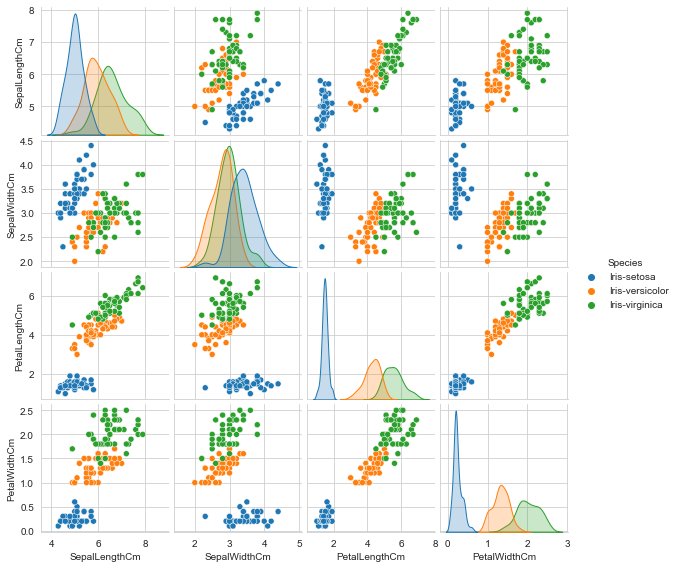

In [8]:
import seaborn as sns
sns.set_style('whitegrid');
sns.pairplot(iris,hue="Species",height=2);
plt.show()

This concludes the K-Means Workshop.

# Thank You